In [24]:
import pickle
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
X_test = pd.read_csv('./data/processed/X_test.csv')
y_test = pd.read_csv('./data/processed/y_test.csv')

In [26]:
with open('./model/best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [27]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.90      0.94      0.92      6778
        >50K       0.79      0.68      0.73      2261

    accuracy                           0.87      9039
   macro avg       0.84      0.81      0.82      9039
weighted avg       0.87      0.87      0.87      9039



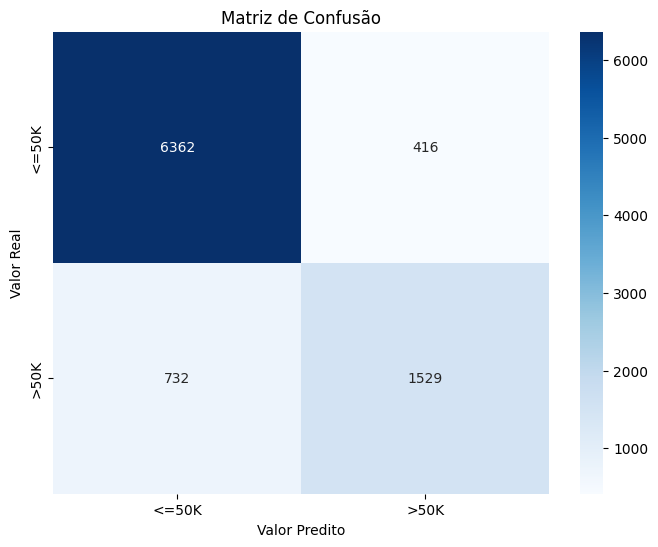

Verdadeiros Negativos (<=50K corretos): 6362
Falsos Positivos (previu >50K, era <=50K): 416
Falsos Negativos (previu <=50K, era >50K): 732
Verdadeiros Positivos (>50K corretos): 1529


In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['<=50K', '>50K'], 
            yticklabels=['<=50K', '>50K'])
plt.ylabel('Valor Real')
plt.xlabel('Valor Predito')
plt.title('Matriz de Confusão')
plt.show()

print(f"Verdadeiros Negativos (<=50K corretos): {cm[0,0]}")
print(f"Falsos Positivos (previu >50K, era <=50K): {cm[0,1]}")
print(f"Falsos Negativos (previu <=50K, era >50K): {cm[1,0]}")
print(f"Verdadeiros Positivos (>50K corretos): {cm[1,1]}")